In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from IPython.display import display
import shutil
from collections import OrderedDict

In [5]:
"""Get the width and height of the terminal window.
"""

width, height = shutil.get_terminal_size((80, 20))

"""
    :param work_dir (str) : Current working directory
    :param main_dir (str) : Always be set to ./SuperBone_ver1
    :param output_dir (str) : The default directory where all outputs are stored
"""  

work_dir = os.getcwd()
main_dir = os.path.dirname(work_dir)
initial_dir = main_dir
output_dir = os.path.join(main_dir,'analyze_figure')

unit = input('Please choose a unit (si or real)')
unit = unit.lower()
simulation = input('Please choose a simulation (LJ or LSM)')
simulation = simulation.upper()

import FileChooser

"""Initialize the class and set the initial directory, file type, and the type of file/folder to choose

    :param initial_dir (str) : Initial directory to open the file dialog
    :param file_type (str) : The type of file to select (e.g. "Image", "DICOM",...)
    :param choose_type (str) : The type of file/folder to select ("File", "Folder", "Multiple Files")
"""  

selector = FileChooser.Selector(initial_dir, file_type = "CSV", choose_type = "File")

"""Open a file dialog windows and return the source path

    :param file_src_path (str) : The absolute path of the source image
"""

file_src_path = selector.run()

Please choose a unit (si or real)si
Please choose a simulation (LJ or LSM)lsm
Import File : /home/marshall323/桌面/SuperBone_ver1.30/mechanic_output.csv


In [6]:
df_mechanic = pd.read_csv(file_src_path,sep=',')
filter = (df_mechanic['Unit']==unit) & (df_mechanic['Simulation']==simulation)

df_filter = df_mechanic[filter]
# display(df_filter)

,Class,Patient Name,ID,Section,Offset_X,Offset_Y,Unit,Simulation,Max Stress (MPa),Strain at Max Stress (%)
1,Aves,CASUARIUS_FEMUR,13,56,-70,0,si,LSM,7.537315,0.538742
3,Aves,CASUARIUS_TMT,13,55,10,40,si,LSM,5.747881,0.678483
5,Aves,RHEA_TBT,22,55,-40,-80,si,LSM,4.971009,0.654845
7,Aves,moa_robust_lt_tbt,25,46,20,10,si,LSM,5.378038,0.779735
9,Aves,moa_rt_tbt,339,56,80,30,si,LSM,5.980809,0.704766
11,Mammala,CERVUS_D_HUMERUS,43,44,-40,70,si,LSM,7.297582,0.630784
13,Mammala,Cephalophus_sylvicultor_radulna,175,55,-50,50,si,LSM,8.042189,0.559540
15,Mammala,Oryx_gazella_tibia,12,56,50,40,si,LSM,0.000031,0.009980


Plot file saved : ss_scatter_si_LSM.png


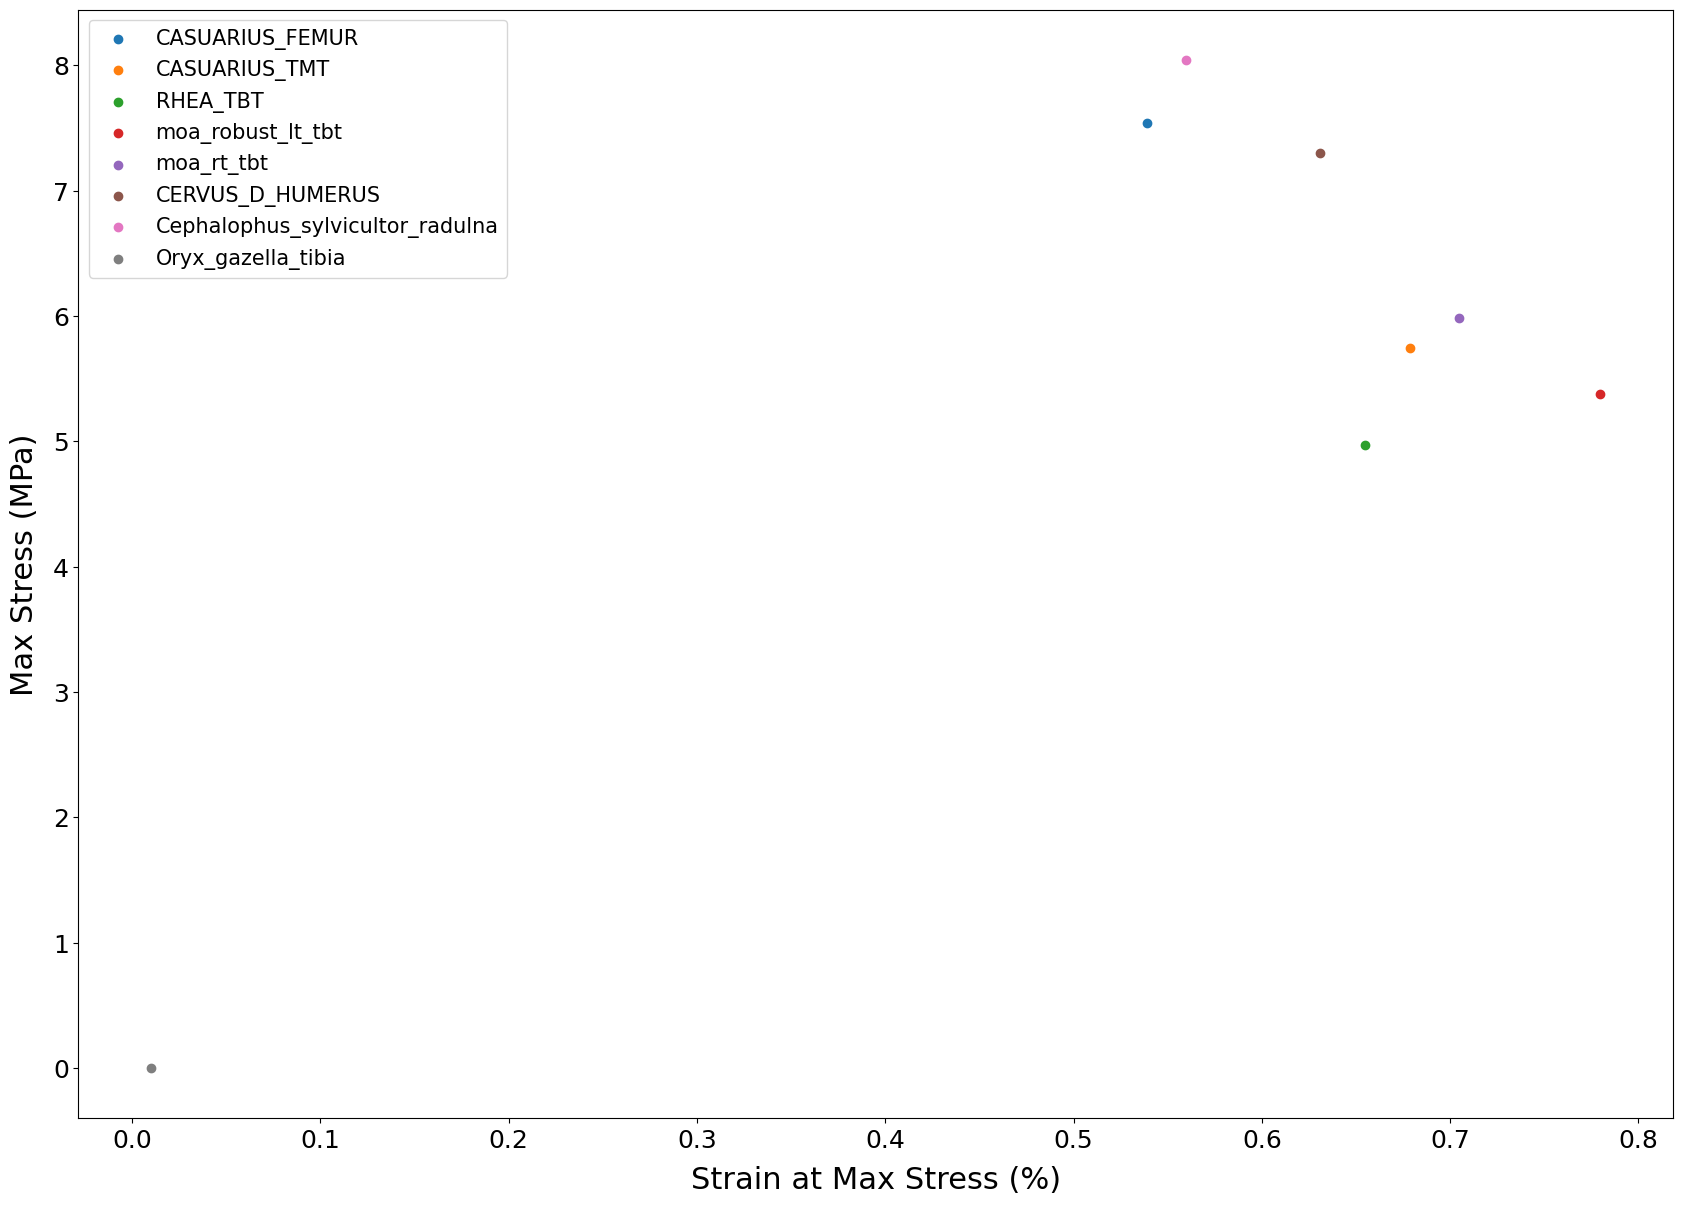

In [7]:
fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*3) 
for patient_name, sxx, exx in zip(df_filter['Patient Name'], 
                                  df_filter['Max Stress (MPa)'], df_filter['Strain at Max Stress (%)']):
    plt.scatter(exx, sxx, label=patient_name)
    
plt.xticks(fontsize=18) 
plt.xlabel('Strain at Max Stress (%)',fontsize=22,labelpad=10)
plt.yticks(fontsize=18) 
plt.ylabel('Max Stress (MPa)',fontsize=22,labelpad=10)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='best', fontsize=15)   

save_path = os.path.join(output_dir,'ss_scatter_{}_{}.png'.format(unit, simulation))
plt.savefig(save_path, bbox_inches='tight',facecolor = 'white', dpi=100)
print('Plot file saved : ss_scatter_{}_{}.png'.format(unit, simulation))
plt.show()